# Proyek Analisis Data: Customer
- **Nama:** Nabila Syaida Ramdani
- **Email:** nabila87611@gmail.com
- **ID Dicoding:** NabilaSyaida

## Menentukan Pertanyaan Bisnis

- Kota mana yang memiliki jumlah pelanggan terbanyak berdasarkan (customer_city)?
- Dapatkah kita membuat grafik untuk menunjukkan jumlah pelanggan di setiap kota (customer city) dan negara bagian (customer_state)?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install scipy

# Mengimport Library yang dibutuhkan
* Pandas digunakan untuk manipulasi dan analisis data
* Numpy adalah library yang digunakan untuk komputasi numerik
* Scipy adalah extension dari numpy
* Matplotlib digunakan untuk visualisasi data, membuat berbagai jenis plot seperti bar char, scatter plot, histogram, dll.


In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [3]:
data = pd.read_csv("olist_customers_dataset.csv", delimiter=",")
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


## Penjelasan Mengenai setiap kolom dari Data

* customer id: berisi ID unik pelanggan, setiap baris memiliki nilai yang berbeda dan unik untuk mengidentifikasi pelanggan secara individual
* Customer_unique_id: berisi ID unik pelanggan, namun mempresentasikan pelanggan yang unik di seluruh sistem atau platform.
* customer_zip_code_prefix: kolom ini menyimpan kode pos dari pelanggan, ini menunjukkan lokasi geografis tempat tinggal pelanggan.
* customer_city: berisi nama kota tempat pelanggan berada.
* customer_state: berisi kode provinsi atau negara bagian pelanggan, menggunakan singkatan dua huruf yang sesuai, misal 
    - SP: Sao Paulo
    - CE: Ceara
    - RS: Rio Grande do Sul

### Gathering Data

##### data.head
Menampilkan lima data teratas dari Data customer

In [4]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Data diambil melalui platform kaggle https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
- Jumlah total observasi 99441 baris dengan 5 kolom dan terdapat beberapa tipe dalam data tersebut diantaranya object dan integer, rata-rata dari semua nilai dalam kolom tersebut adalah 35.137, standar deviasi mengukur seberapa jauh nilai-nilai tersebut menyebar dari nilai rata-ratanya, data ini menunjukkan penyebaran sekitar 29.798.

### Assessing Data

In [6]:
data.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [7]:
data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**
- Tidak adanya data yang null(kosong) , berarti data tersebut lengkap dan tidak adanya nilai yang hilang, dan tidak diperlukan teknik untuk mengatasi missing value.
- Dapat dilihat pada output di atas pada kolom customer_id 0 menunjukkan tidak adanya data yang hilang, dan seterusnya pada semua kolom

### Cleaning Data

In [8]:
data.duplicated().sum()

0

**Insight:**
- Menunjukkan tidak adanya data yang duplikat.

## Exploratory Data Analysis (EDA)

In [9]:
data.describe(include = "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Dapat dilihat konsentrasi pelanggan, banyak yang berasal dari kota Sao Paulo dan negara bagian SP.
- Sao Paulo adalah negara bagian yang memiliki frekuensi tertinggi, dengan 41476 pelanggan dapat dilihat pada customer_state.

In [10]:
city = data.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
city

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

**Insight:**
- Dapat dilihat kolom pertama menunjukkan nama kota (customer_city) dan kolom kedua menunjukkan jumlah pelanggan dari masing-masing kota (customer_state), Sao paulo memiliki 15.540 pelanggan, kota Laogao hanya memiliki 1 pelanggan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kota mana yang memiliki pelanggan terbanyak?

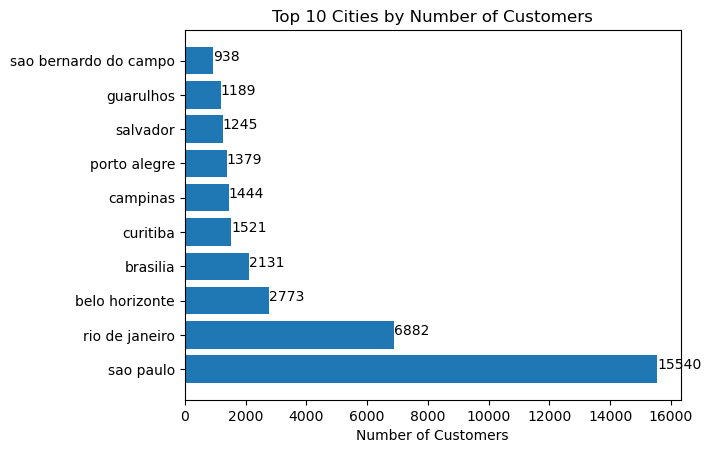

In [11]:
city_counts = data["customer_city"].value_counts().head(10)  # 10 kota teratas
plt.barh(city_counts.index, city_counts.values)
plt.xlabel("Number of Customers")
plt.title("Top 10 Cities by Number of Customers")

for index, value in enumerate(city_counts.values):
  plt.text(value, index, str(value))
plt.show()

- Dapat dilihat dari bar chart di atas menunjukkan bahwa pelanggan terbanyak adalah kota Sao Paulo dengan 15540 pelanggan.

### Pertanyaan 2:

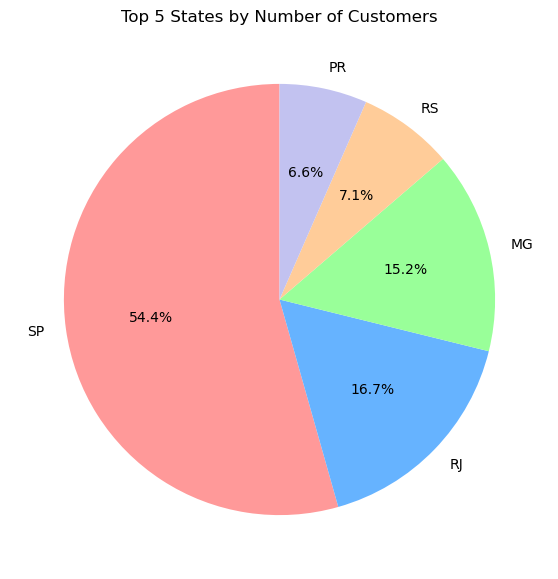

In [12]:
state_counts = data["customer_state"].value_counts().head(5)
plt.figure(figsize=(7, 7))
plt.pie(state_counts.values, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

plt.title("Top 5 States by Number of Customers")
plt.show()


 **Insight:**
- Negara Sao Paulo dengan jumlah pelanggan terbanyak mencakup 54.4% dari total pelanggan, negara bagian kedua terbanyak yaitu Rio de Janeiro dengan nilai 16.7%, negara ketiga terbanyak yaitu MG (Minas Gerais) dengan nilai 15.2%.

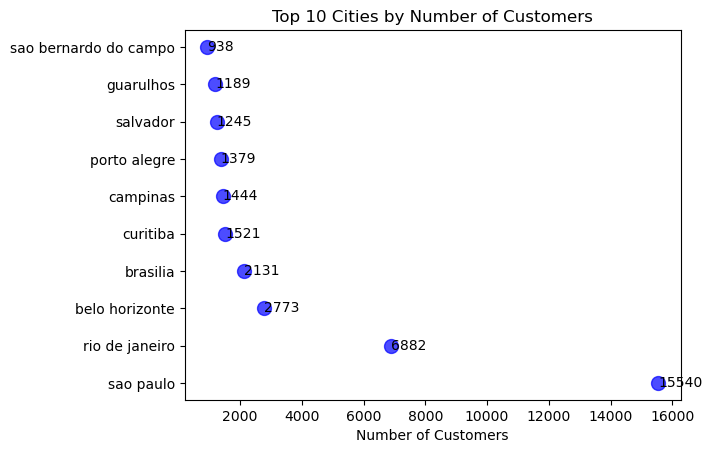

In [20]:
city_counts = data["customer_city"].value_counts().head(10)  # 10 kota teratas
plt.scatter(city_counts.values, city_counts.index, color='blue', s=100, alpha=0.7)
plt.xlabel("Number of Customers")
plt.title("Top 10 Cities by Number of Customers")
for index, value in enumerate(city_counts.values):
    plt.text(value, index, str(value), va='center')
plt.show()

* Sumbu Y menampilkan nama-nama 10 kota dengan jumlah pelanggan terbanyak, seperti Sao Paulo, Rio de Janeiro, Belo Horizonte, Brasilia, Curitiba dst.
* Sumbu X menunjukkan jumlah pelanggan di setiap kota, Sao Paulo memiliki 15.540 pelanggan, sementara Sao bernado memiliki 938 pelanggan.

## Analisis Lanjutan (Opsional)

In [13]:
unique_cities = set(data["customer_city"])
print(unique_cities)


{'sao joao do piaui', 'tuparendi', 'ipameri', 'porto seguro', 'cachoeira da prata', 'bataipora', 'desterro de entre rios', 'pirajui', 'palmeirinha', 'bacuri', 'ibiam', 'vila velha', 'carnaiba do sertao', 'lagoa do carro', 'sitio novo do tocantins', 'rubim', 'rosana', 'sete de setembro', 'itai', 'uniao dos palmares', 'camamu', 'itarantim', 'cocal do sul', 'inimutaba', 'cerro largo', 'ajuricaba', 'sandolandia', 'arcoverde', 'cantagalo', 'cerquilho', 'coxim', 'fazenda rio grande', 'campo belo', 'cajati', 'pariquera-acu', 'angelo frechiani', 'jardim alegre', 'cambara', 'pompeu', 'macaubas', 'hidreletrica tucurui', 'sirinhaem', 'alfredo vasconcelos', 'jeremoabo', 'ibiassuce', 'nazareno', 'caarapo', 'teutonia', 'rio casca', 'sao pedro da uniao', 'acailandia', 'grajau', 'reserva do cabacal', 'rio de contas', 'ribeirao cascalheira', 'capivari de baixo', 'natividade', 'witmarsum', 'ouro fino', 'ipubi', "tanque d'arca", 'padre carvalho', 'passagem franca', 'itapaci', 'rio verde', 'embu das artes

In [14]:
unique_state = set(data["customer_state"])
print(unique_state)

{'RO', 'PB', 'CE', 'SC', 'MS', 'RN', 'MG', 'AP', 'AC', 'AM', 'MA', 'RS', 'TO', 'RJ', 'PE', 'PA', 'DF', 'BA', 'PI', 'GO', 'RR', 'SP', 'ES', 'MT', 'AL', 'PR', 'SE'}


## Conclusion

- Dari data customer yang berisi 99441 baris dengan 5 kolom, dapat dilihat terdapat 5 kota diantaranya sao bernardo do campo, franca, sao paulo, mogi das cruzes, dan campinas. Kota yang memiliki pelanggan terbanyak yaitu kota Sao Paulo yaitu sebanyak 15540 pelanggan.
- Kita dapat menggunakan bar chart untuk memvisualisasikan 10 kota yang memiliki customer terbanyak.

# RFM Analysis, Geoanalysis, dan Clustering

In [32]:
import pandas as pd
data = {
    'customer_id': ['06b8999e2fba1a1fbc88172c00ba8bc7', '18955e83d337fd6b2def6b18a428ac77', 
                    '4e7b3e00288586ebd08712fdd0374a03', 'b2b6027bc5c5109e529d4dc6358b12c3',
                    '4f2d8ab171c80ec8364f7c12e35b23ad'],
    'total_orders': [5, 10, 3, 8, 12],
    'total_spent': [500, 1500, 300, 800, 2000]
}

df = pd.DataFrame(data)
def segment_customer(row):
    if row['total_orders'] > 8 and row['total_spent'] > 1000:
        return 'High Value'
    elif row['total_orders'] > 5:
        return 'Medium Value'
    else:
        return 'Low Value'
df['Customer_Segment'] = df.apply(segment_customer, axis=1)
df

,customer_id,total_orders,total_spent,Customer_Segment
0,06b8999e2fba1a1fbc88172c00ba8bc7,5,500,Low Value
1,18955e83d337fd6b2def6b18a428ac77,10,1500,High Value
2,4e7b3e00288586ebd08712fdd0374a03,3,300,Low Value
3,b2b6027bc5c5109e529d4dc6358b12c3,8,800,Medium Value
4,4f2d8ab171c80ec8364f7c12e35b23ad,12,2000,High Value


Berikut adalah rangkuman dari tabel yang berisi informasi tentang pelanggan:

- customer_id: Identifikasi unik setiap pelanggan.
- total_orders: Jumlah total pesanan yang dilakukan oleh pelanggan.
- total_spent: Total uang yang dihabiskan oleh setiap pelanggan.
- Customer_Segment: Klasifikasi pelanggan berdasarkan nilai mereka:
  - Low Value: Pelanggan dengan pengeluaran rendah (misalnya, 500 dan 300).
  - Medium Value: Pelanggan dengan pengeluaran sedang (misalnya, 800).
  - High Value: Pelanggan dengan pengeluaran tinggi (misalnya, 1500 dan 2000).

### Kesimpulan:
Tabel ini membantu perusahaan memahami perilaku dan nilai pelanggan, yang dapat digunakan untuk mengembangkan strategi pemasaran dan pelayanan yang lebih efektif.

# Geoanalysis

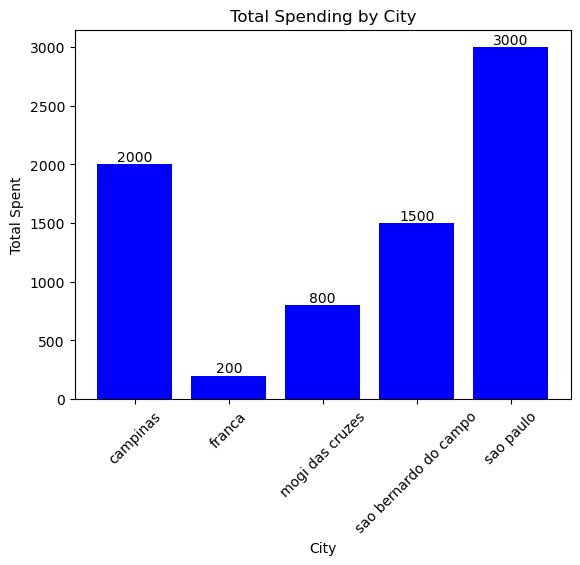

In [39]:
geo_data = {
    'customer_city': ['franca', 'sao bernardo do campo', 'sao paulo', 'mogi das cruzes', 'campinas'],
    'total_spent': [200, 1500, 3000, 800, 2000]
}
geo_df = pd.DataFrame(geo_data)
geo_analysis = geo_df.groupby('customer_city').sum().reset_index()
bars = plt.bar(geo_analysis['customer_city'], geo_analysis['total_spent'], color='blue')

for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Menambahkan teks
plt.xlabel("City")
plt.ylabel("Total Spent")
plt.title("Total Spending by City")
plt.xticks(rotation=45)
plt.show()


Grafik ini menunjukkan gambaran tentang seberapa banyak total pengeluaran pelanggan dari berbagai kota.

# RFM Analysis

In [35]:
import pandas as pd
transactions = {
    'customer_id': ['06b8999e2fba1a1fbc88172c00ba8bc7', '18955e83d337fd6b2def6b18a428ac77', 
                    '4e7b3e00288586ebd08712fdd0374a03', 'b2b6027bc5c5109e529d4dc6358b12c3', 
                    '4f2d8ab171c80ec8364f7c12e35b23ad'],
    'order_date': ['2024-01-01', '2024-01-05', '2024-01-20', '2024-02-01', '2024-02-15'],
    'order_amount': [100, 200, 150, 400, 500]
}

trans_df = pd.DataFrame(transactions)
trans_df['order_date'] = pd.to_datetime(trans_df['order_date'])
current_date = pd.to_datetime('2024-04-01')
rfm = trans_df.groupby('customer_id').agg(
    Recency=('order_date', lambda x: (current_date - x.max()).days),  # Recency
    Frequency=('order_date', 'count'),  # Frequency
    Monetary=('order_amount', 'sum')  # Monetary
).reset_index()

print("Nilai unik Recency:", rfm['Recency'].unique())
print("Nilai unik Frequency:", rfm['Frequency'].unique())
print("Nilai unik Monetary:", rfm['Monetary'].unique())
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')

if rfm['Frequency'].nunique() > 1:
    rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
else:
    rfm['F_Score'] = 1 
if rfm['Monetary'].nunique() > 1:
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')
else:
    rfm['M_Score'] = 1 
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm


Nilai unik Recency: [91 87 72 46 60]
Nilai unik Frequency: [1]
Nilai unik Monetary: [100 200 150 500 400]


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,06b8999e2fba1a1fbc88172c00ba8bc7,91,1,100,1,1,1,111
1,18955e83d337fd6b2def6b18a428ac77,87,1,200,2,1,2,212
2,4e7b3e00288586ebd08712fdd0374a03,72,1,150,3,1,1,311
3,4f2d8ab171c80ec8364f7c12e35b23ad,46,1,500,4,1,4,414
4,b2b6027bc5c5109e529d4dc6358b12c3,60,1,400,4,1,3,413


* Recency menunjukkan beberapa hari yang telah berlalu sejak pelanggan terakhir melakukan pembelian, angka yang lebih rendah berarti pelanggan baru-baru ini melakukan pembelian, sementara angka yang lebih tinggi menunjukkan bahwa pelanggan tidak berbelanja dalam waktu yang lama.

* Frequency menunjukkan jumlah transaksi yang dilakukan oleh pelanggan dalam periode analisis. dalam contoh ini semua pelanggan memiliki nilai frequency 1 yang berarti setiap pelanggan hanya melakukan satu pembelian.

* Monetary menunjukkan total uang yang dibelanjakan oleh pelanggan.

* R_Score yang tinggi menunjukkan pelanggan yang lebih baru, sedangkan skor yang rendah menunjukkan pelangan yang lama tidak melakukan pembelian.

* F_Score adalah skor untuk frequency, karena semua hanya melakukan satu pembelian, maka semua mendapatkan skor 1.

* M_Score adalah skor untuk monetary, menunjukkan jumlah total uang yang dibelanjakkan

* RFM_score adalah kombinasi dari tiga skor R,F dan M. Skor ini dapat digunakan untuk mengelompokkan pelanggan menjadi segmen yang berbeda berdasarkan perilaku pembelian. Contohnya RFM_Score 111 adalah pelanggan yang paling tidak aktif dan paling sedikit berbelanja, sedangkan pelanggan dengan RFM_Score 414 adalah pelanggan yang baru.

In [15]:
rfm_df = data.groupby(by="customer_id", as_index=False).agg({
    "customer_id": "max",
    "customer_city": "nunique",
    "customer_state": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "monetary"]

rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"], errors='coerce')
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,monetary
0,00012a2ce6f8dcda20d059ce98491703,SP
1,000161a058600d5901f007fab4c27140,MG
2,0001fd6190edaaf884bcaf3d49edf079,ES
3,0002414f95344307404f0ace7a26f1d5,MG
4,000379cdec625522490c315e70c7a9fb,SP


In [16]:
data.to_csv("all_data.csv", index=False)